<h1><b>MLB TEAM DATA EDA

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats

Read in our data from Baseball Reference

In [2]:
data = pd.read_csv('TeamData_1990-2018', delimiter='\t')

In [3]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,key_0,Tm_x,W,L,W-L%,GB,Abv,Tm_y,#Bat,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Year
0,0,25,Atlanta Braves,65,97,0.401,26.0,ATL,ATL,46,...,0.706,90,2177,101,27,49,31,36,1074,1990
1,1,4,Baltimore Orioles,76,85,0.472,11.5,BAL,BAL,47,...,0.700,99,2002,131,40,72,41,50,1230,1990
2,2,0,Boston Red Sox,88,74,0.543,--,BOS,BOS,43,...,0.739,104,2180,174,28,48,44,59,1233,1990
3,3,10,California Angels,80,82,0.494,23.0,CAL,CAL,43,...,0.720,104,2180,142,28,58,45,41,1202,1990
4,4,17,Chicago Cubs,77,85,0.475,18.0,CHC,CHC,39,...,0.706,87,2194,100,30,61,51,68,1124,1990


In [4]:
df.columns

Index(['Unnamed: 0', 'key_0', 'Tm_x', 'W', 'L', 'W-L%', 'GB', 'Abv', 'Tm_y',
       '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Year'],
      dtype='object')

<h2><b> DATA CLEANING

In [5]:
import missingno as msno
%matplotlib inline
#check for missing values in the df
#msno.matrix(compiled_df.iloc[:,19:])
#msno.matrix(compiled_df.iloc[:,:19])

In [78]:
#reorder columns and drop redundant columns
# df = df[['Tm_x','Abv', 'Year', 'W', 'L', 'W-L%', 'GB', 'BatAge', '#Bat', 'G', 'AB', 'PA', 'R', 'R/G',
#             'H', '2B', '3B', 'HR', 'RBI', 'TB', 'BA', 'BB', 'OBP', 'SLG', 'OPS', 'OPS+', 'SO', 'SB', 'CS',
#             'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB']]

In [79]:
#check for any NaN values
df.isnull().any().sum()

0

In [8]:
df = df.rename(index=str, columns={"Tm_x": "Team", "W-L%": "W/L", '#Bat': 'Num_Hitters', '2B': 'Doubles', '3B': 'Triples', 'OPS+': 'OPS_Plus'})

In [9]:
#create column for hits per game
df['H/G'] = df['H']/df['G']

#create column for extra base hits
df['Extra_Base_Hits'] = df['Doubles']+df['Triples']+df['HR']

#create column for BABIP
df['BABIP'] = (df['H']-df['HR'])/(df['AB'] - df['SO'] - df['HR'] + df['SF'])

In [113]:
#create column for interaction of OBP*SLG
df['OBP_times_SLG'] = df.OBP*df.SLG

In [316]:
df['Age_of_Hitters'] = pd.cut(df.BatAge,4, labels=["Rookies", "Young_Aged", "Avg_Aged", "Vet_Aged"])

In [291]:
#drop rows where year is 1994/1995 due to MLB strike
df = df[df.Year != 1994]
df = df[df.Year != 1995]

In [ ]:
#create df that does not include 2018
df_not_2018 = df[df.Year != 2018]

In [498]:
df_not_2018.head()

,Team,Abv,Year,W,L,W/L,GB,BatAge,Num_Hitters,G,...,SH,SF,IBB,LOB,H/G,Extra_Base_Hits,BABIP,Age_of_Hitters,OBP_times_SLG,Predicted_Runs
0,Atlanta Braves,ATL,1990,65,97,0.401,26.0,27.4,46,162,...,49,31,36,1074,8.493827,451,0.278249,Young_Aged,0.123156,662
1,Baltimore Orioles,BAL,1990,76,85,0.472,11.5,27.3,47,161,...,72,41,50,1230,8.248447,388,0.274501,Young_Aged,0.122100,649
2,Boston Red Sox,BOS,1990,88,74,0.543,--,28.9,43,162,...,48,44,59,1233,9.271605,435,0.299635,Young_Aged,0.135880,717
3,California Angels,CAL,1990,80,82,0.494,23.0,29.8,43,162,...,58,45,41,1202,8.938272,411,0.291182,Avg_Aged,0.128639,699
4,Chicago Cubs,CHC,1990,77,85,0.475,18.0,28.2,39,162,...,61,51,68,1124,9.098765,412,0.287990,Young_Aged,0.123088,660


In [466]:
#create model that only includes 2018
df_2018 = df[df.Year == 2018]

In [502]:
df_2018.drop(['Predicted_Runs'], axis=1, inplace = True)
df_2018.head()

,Team,Abv,Year,W,L,W/L,GB,BatAge,Num_Hitters,G,...,HBP,SH,SF,IBB,LOB,H/G,Extra_Base_Hits,BABIP,Age_of_Hitters,OBP_times_SLG
818,Arizona Diamondbacks,ARI,2018,82,80,0.506,9.5,29.2,49,162,...,52,38,45,36,1086,7.919753,485,0.286120,Young_Aged,0.123070
819,Atlanta Braves,ATL,2018,90,72,0.556,--,27.3,58,162,...,66,49,43,53,1143,8.845679,518,0.302404,Young_Aged,0.135108
820,Baltimore Orioles,BAL,2018,47,115,0.290,61.0,28.4,56,162,...,57,13,35,19,1027,8.129630,445,0.286403,Young_Aged,0.116518
821,Boston Red Sox,BOS,2018,108,54,0.667,--,27.7,44,162,...,55,7,48,38,1124,9.314815,594,0.309026,Young_Aged,0.153567
822,Chicago Cubs,CHC,2018,95,68,0.583,1.0,27.2,50,163,...,78,40,46,67,1224,8.914110,487,0.312515,Rookies,0.136530


<h2><b> VISUALIZATIONS

In [296]:
df[['R', 'OBP', 'SLG', 'LOB', 'SF', 'OBP_times_SLG']].describe()

,R,OBP,SLG,LOB,SF,OBP_times_SLG
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,741.929293,0.328814,0.412691,1140.559343,45.385101,0.136002
std,85.533752,0.014679,0.027965,58.725391,9.001583,0.014341
min,513.000000,0.292000,0.335000,965.000000,24.000000,0.098155
25%,682.750000,0.319000,0.393000,1100.000000,39.000000,0.125909
50%,735.500000,0.328500,0.411000,1140.000000,45.000000,0.134970
75%,797.250000,0.339000,0.432000,1181.000000,51.000000,0.145197
max,1009.000000,0.373000,0.491000,1312.000000,75.000000,0.177144


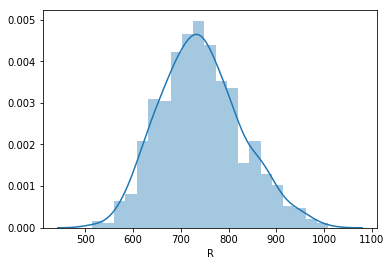

In [297]:
#distributions of runs
sns.distplot(df['R'])

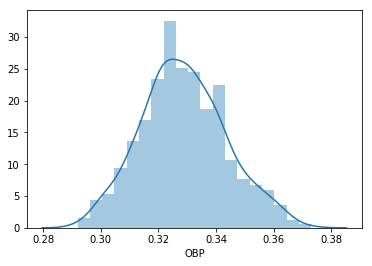

In [347]:
sns.distplot(df['OBP'])

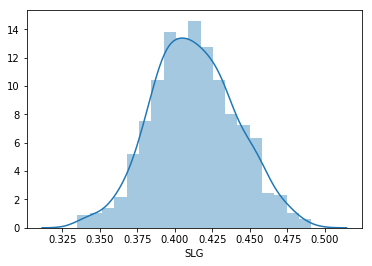

In [298]:
#distribution of SLG
sns.distplot(df['SLG'])

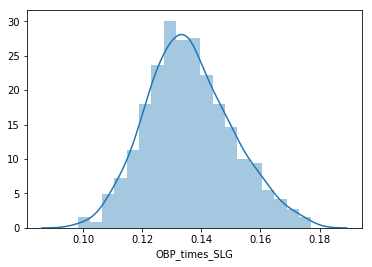

In [348]:
sns.distplot(df['OBP_times_SLG'])

r: 0.8980068452393458


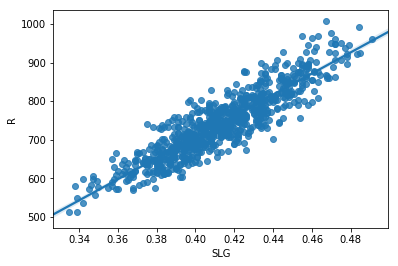

In [299]:
#scatterplot of SLG and R
print('r:', df['SLG'].corr(df['R']))
#sns.scatterplot(df['SLG'], df['R'])
sns.regplot(x=df['SLG'], y=df['R'], data=df)

r: 0.8850805395638963


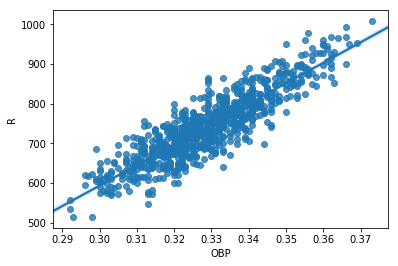

In [300]:
#scatterplot of OBP and R
print('r:', df['OBP'].corr(df['R']))
#sns.scatterplot(df['OBP'], df['R'])
sns.regplot(x=df['OBP'], y=df['R'], data=df)

r: 0.7402891588555475


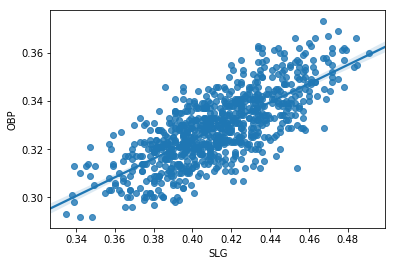

In [301]:
#scatterplot of R and W
print('r:',df['SLG'].corr(df['OBP']))
sns.regplot(x=df['SLG'], y=df['OBP'], data=df)


r: 0.8164089648336568


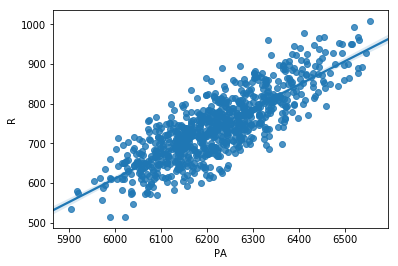

In [302]:
print('r:',df['PA'].corr(df['R']))
sns.regplot(x=df['PA'], y=df['R'], data=df)

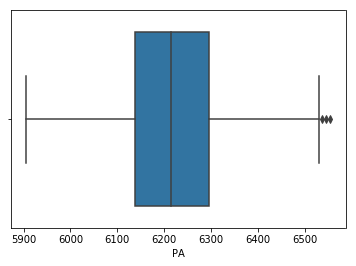

In [303]:
sns.boxplot(x=df['PA'])

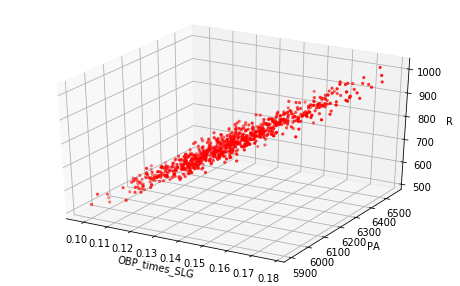

In [342]:
#3D scatter plot of OBP_times_SLG, PA, and R
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(8, 5)

x = df['OBP_times_SLG']
y = df['PA']
z = df['R']



ax.scatter(x, y, z, c='r', marker='.')


ax.set_xlabel('OBP_times_SLG')
ax.set_ylabel('PA')
ax.set_zlabel('R')

plt.show()

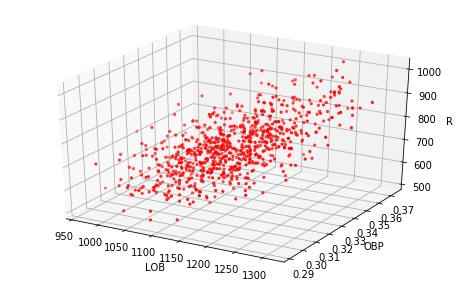

In [346]:
#3D scatter plot of LOB, OBP, and R
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(8, 5)

x = df['LOB']
y = df['OBP']
z = df['R']



ax.scatter(x, y, z, c='r', marker='.')


ax.set_xlabel('LOB')
ax.set_ylabel('OBP')
ax.set_zlabel('R')

plt.show()

<B><h1>BUILDING OUR REGRESSION MODEL

In [548]:
#model for R ~ PA + LOB + OBP + OBP_times_SLG using the df_not_2018 dataframe
model = ols(formula='R ~ PA + LOB + OBP + OBP_times_SLG', data=df_not_2018).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4588.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:30:47   Log-Likelihood:                -3243.7
No. Observations:                 762   AIC:                             6497.
Df Residuals:                     757   BIC:                             6520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1867.7977     65.475    -28.527      0.000   -1996.332   -1739.264
PA                0.3672      0.014     25.463      0.000       0.339       0.395
LOB              -0.6483      0.024    -27.338      0.000      -0.695      -0.602
OBP            2148.2308    146.223     14.692      0.000    1861.181    2435.281
OBP_times_SLG  2633.9704    130.137     20.240      0.000    2378.499    2889.442
==============================================================================
Omnibus:                        0.314   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.347
Skew:                          -0.049   Prob(JB):                        0.841
Kurtosis:                       2.962   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

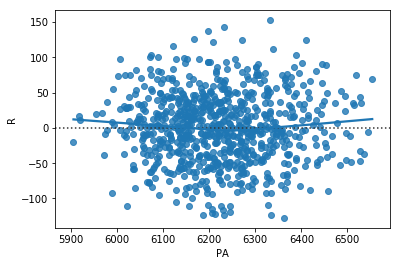

In [308]:
sns.residplot(df['PA'], df['R'], lowess = True)

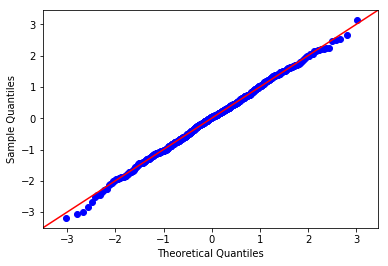

In [550]:
f1 = 'R~PA+LOB+OBP+OBP_times_SLG'
model_2 = ols(formula = f1, data = df).fit()
resid = model_2.resid
fig2 = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit=True)

In [310]:
#run Goldfeld Quandt test
#test for heteroskedasticity 
names = ['F Statistic', 'p-value']
test = sms.het_goldfeldquandt(model_2.resid, model_2.model.exog)
list(zip(names,test))

#null hypothesis assumes homoskedacity 

[('F Statistic', 0.9929817347993114), ('p-value', 0.5278456472318436)]

In [513]:
def predict_runs_scored(PA, OBP_times_SLG, OBP, LOB):
    return int((-1867.7977 + (0.3672*PA) + (-0.6483*LOB) + (2148.2308*OBP) + (2633.9704*OBP_times_SLG)))

In [495]:
#function that will predict the season runs for each row
#returns a list of predictions
def get_predicted_vals(dataframe):
    predictions = []
    for index, row in dataframe.iterrows():
        pa, obp, lob, obp_times_slg = row['PA'], row['OBP'], row['LOB'], row['OBP_times_SLG']
        predicted_runs_scored = predict_runs_scored(pa, obp_times_slg, obp, lob)
        #print(predicted_runs_scored)
        predictions.append(predicted_runs_scored)
    return predictions

In [519]:
#create variable for list of predicted values
values_predicted = get_predicted_vals(df_not_2018)


In [520]:
#set new column equal to the list of predictions
df_not_2018['Predicted_Runs'] = values_predicted

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [521]:
df_not_2018.head()

,Team,Abv,Year,W,L,W/L,GB,BatAge,Num_Hitters,G,...,SH,SF,IBB,LOB,H/G,Extra_Base_Hits,BABIP,Age_of_Hitters,OBP_times_SLG,Predicted_Runs
0,Atlanta Braves,ATL,1990,65,97,0.401,26.0,27.4,46,162,...,49,31,36,1074,8.493827,451,0.278249,Young_Aged,0.123156,662
1,Baltimore Orioles,BAL,1990,76,85,0.472,11.5,27.3,47,161,...,72,41,50,1230,8.248447,388,0.274501,Young_Aged,0.122100,650
2,Boston Red Sox,BOS,1990,88,74,0.543,--,28.9,43,162,...,48,44,59,1233,9.271605,435,0.299635,Young_Aged,0.135880,718
3,California Angels,CAL,1990,80,82,0.494,23.0,29.8,43,162,...,58,45,41,1202,8.938272,411,0.291182,Avg_Aged,0.128639,699
4,Chicago Cubs,CHC,1990,77,85,0.475,18.0,28.2,39,162,...,61,51,68,1124,9.098765,412,0.287990,Young_Aged,0.123088,660


In [556]:
from sklearn.metrics import mean_squared_error
import math

In [537]:
runs_true = df_not_2018['R']
runs_pred = df_not_2018['Predicted_Runs']

In [538]:
rmse = math.sqrt(mean_squared_error(runs_true, runs_pred))
runs_mean = df_not_2018['R'].mean()
accuracy = rmse/runs_mean
print('percentage of error:', round((accuracy*100),3), '%')

percentage of error: 2.302 %


<h1><b> TEST MODEL ON STATS FROM 2018

In [516]:
values_predicted_2018 = get_predicted_vals(df_2018)

In [517]:
df_2018['Predicted_Runs'] = values_predicted_2018

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [530]:
df_2018[['Team', 'Year', 'R', 'Predicted_Runs']]

,Team,Year,R,Predicted_Runs
818,Arizona Diamondbacks,2018,693,679
819,Atlanta Braves,2018,759,738
820,Baltimore Orioles,2018,622,629
821,Boston Red Sox,2018,876,850
822,Chicago Cubs,2018,761,752
823,Chicago White Sox,2018,656,648
824,Cincinnati Reds,2018,696,710
825,Cleveland Indians,2018,818,794
826,Colorado Rockies,2018,780,769
827,Detroit Tigers,2018,630,596


In [557]:
runs_true_2018 = df_2018['R']
runs_pred_2018 = df_2018['Predicted_Runs']

In [558]:
mean_squared_error = mean_squared_error(runs_true_2018, runs_pred_2018)
print('Mean squared error:',mean_squared_error)
rmse = math.sqrt(mean_squared_error)

runs_mean = df_2018['R'].mean()

#find average percent of error
poe = rmse/runs_mean

print('RMSE:', rmse, 'runs')
print('2018 mean runs scored:', runs_mean, 'runs')
print('percentage of error:', round((poe*100),3), '%')

Mean squared error: 313.56666666666666
RMSE: 17.70781371786666 runs
2018 mean runs scored: 721.0 runs
percentage of error: 2.456 %


<b>Model conclusion:<br><br></b>
Runs ~ PA + LOB + OBP + OBP*SLG <br><br>
The model shows a high r-squared (.960) and seems to predict a team's number of runs per season fairly well. As seen in the test case, the Chicago Cubs scored a total 777 runs throughout 2001 the season. My model predicts that a team with those same seasonal statistics would score 768 runs. For this test case, there is only a difference of 9 runs over the entire season. This result equates to roughly 0.05 run difference per game (9 runs / 162 games).

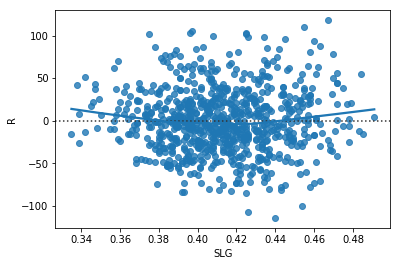

In [327]:
sns.residplot(df['SLG'], df['R'], lowess = True)

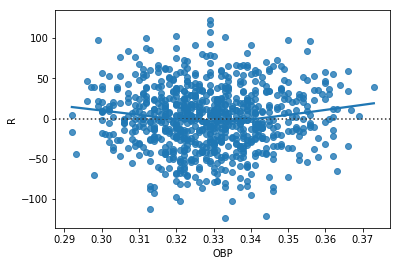

In [325]:
sns.residplot(df['OBP'], df['R'], lowess = True)

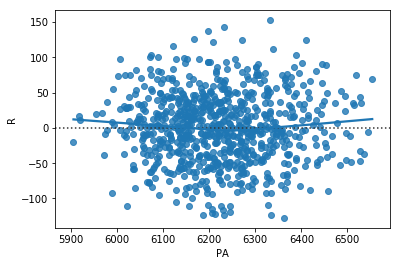

In [328]:
sns.residplot(df['PA'], df['R'], lowess = True)

<b><h1>HYPOTHESIS TEST

The New York Yankees have won the most World Series Championships within the span of 1990-2018 <b>(5)</b>. Let's look into how they match up to the rest of the MLB in terms of runs scored.<br><br>
<b> H0: The mean runs for NYY = the mean runs for of all of MLB<br>
    Ha: The mean runs for NYY > the mean runs for of all of MLB

In [350]:
yankees_sample = df[df['Abv'] == 'NYY']['R'].mean()
mlb_pop_mean = df['R'].mean()
mlb_pop_std = df['R'].std()

print('Yankees Mean:', yankees_sample)
print('MLB Mean:', mlb_pop_mean)
print('MLB Std:', mlb_pop_std)

Yankees Mean: 824.3703703703703
MLB Mean: 741.929292929293
MLB Std: 85.53375244360997


In [351]:
def get_z_score(sample_, pop_mean, pop_std):
    sample = sample_
    mean = pop_mean
    std = pop_std
    z_score = (sample - mean) / std
    print('Z Score:', z_score)
    if z_score >= 1.96:
        print('Reject null hypothesis')
    elif z_score <= -1.96:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    return z_score

In [352]:
get_z_score(yankees_sample, mlb_pop_mean, mlb_pop_std)

Z Score: 0.9638426362204614
Fail to reject null hypothesis


0.9638426362204614

<b>With a z score of .95 we fail to reject the null hypothesis

In [349]:
model_3 = ols(formula='R~PA+SLG+OBP', data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3013.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:14:56   Log-Likelihood:                -3647.6
No. Observations:                 792   AIC:                             7303.
Df Residuals:                     788   BIC:                             7322.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1327.7461     62.630    -21.200      0.000   -1450.688   -1204.804
PA             0.1171      0.015      7.691      0.000       0.087       0.147
SLG         1637.0386     45.902     35.664      0.000    1546.934    1727.144
OBP         2023.4931    137.546     14.711      0.000    1753.494    2293.492
==============================================================================
Omnibus:                        4.467   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.306
Skew:                           0.163   Prob(JB):                        0.116
Kurtosis:                       3.156   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(792, 41)